In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = 'Datasets/data.csv'
file_df = pd.read_csv(file)
File_df = pd.DataFrame(file_df)
File_df['Countries'].value_counts().head(25)
America = File_df.loc[(File_df['Countries'] == 'United States of America') |
                      (File_df['Countries'] == 'Mexico') |
                      (File_df['Countries'] == 'Canada') |
                      (File_df["Countries"] == 'Canada, United States of America'),:]
America

ID                             Name in English  \
68    1506                            Huasteca Náhuatl   
82    1503                             Central Náhuatl   
156    784                                      Navajo   
160    916                              Sierra Totonac   
166    904                                 Phurhepecha   
...    ...                                         ...   
2703  2391                          Tuscarora (Canada)   
2706   280                                       Unami   
2707  2392                       Upper Tanana (Canada)   
2711  2393                    Western Abenaki (Canada)   
2712   283  Western Abenaki (United States of America)   

                                   Name in French  \
68                            náhuatl du Huasteca   
82                                náhuatl central   
156                                        navajo   
160                        totonaque de la Sierra   
166                                     purepecha   
...                                           ...   
2703                           tuscarora (Canada)   
2706                                     delaware   
2707                         haut-tanana (Canada)   
2711                 abénaqui occidental (Canada)   
2712  abénaqui occidental (États-Unis d'Amérique)   

                          Name in Spanish                 Countries  \
68                   nahua de la Huasteca                    Mexico   
82                          nahua central                    Mexico   
156                                navajo  United States of America   
160                  totonacano de Sierra                    Mexico   
166                             purépecha                    Mexico   
...                                   ...                       ...   
2703                   tuscarora (Canadá)                    Canada   
2706                                unamí  United States of America   
2707                tanana alto  (Canadá)                    Canada   
2711          abenakí occidental (Canadá)                    Canada   
2712  abenakí occidental (Estados Unidos)  United States of America   

     Country codes alpha 3 ISO639-3 codes Degree of endangerment  \
68                     MEX            nhe             Vulnerable   
82                     MEX  nhn, nch, ncx             Vulnerable   
156                    USA            nav             Vulnerable   
160                    MEX            tos    Severely endangered   
166                    MEX            tsz             Vulnerable   
...                    ...            ...                    ...   
2703                   CAN            tus  Critically endangered   
2706                   USA            unm                Extinct   
2707                   CAN            tau  Critically endangered   
2711                   CAN            abe  Critically endangered   
2712                   USA            abe                Extinct   

                                 Alternate names Name in the language  \
68                                      Mexicano                  NaN   
82             Mexicano, Aztec (in English only)                  NaN   
156                                 Navajo, Diné                  NaN   
160   Highland Totonac, Totonaco central del sur                  NaN   
166                    Purépecha, Tarasco, Porhé                  NaN   
...                                          ...                  ...   
2703                                         NaN                  NaN   
2706         Delaware, Oklahoma Delaware, Lenape                  NaN   
2707                                         NaN                  NaN   
2711                                         NaN                  NaN   
2712                                         NaN                  NaN   

      Number of speakers                                            Sources  \
68              463183.0  Census 2000, informati

In [3]:
File_DF = America.iloc[:, [0, 1, 4, 7, 10, 12, 13, 14]]
Population_Dict = {'Mexico':126200000, 'Canada':36740000, 'United States of America':325000000, 'Canada, United States of America':361740000}
File_DF['Population'] = File_DF['Countries'].map(Population_Dict)
File_DF['Speaker Percentage'] = (File_DF['Number of speakers'] / File_DF['Population'])*100
File_DF["Speaker Percentage"] = File_DF["Speaker Percentage"].map("{:,.2f}%".format)
File_DF = File_DF[['ID', 'Name in English', 'Countries', 
                   'Number of speakers', 'Population', 'Speaker Percentage',
                  'Latitude', 'Longitude', 'Degree of endangerment', 'Description of the location']]
File_DF.set_index('ID', inplace=True)

C:\Users\aditm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\aditm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\aditm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A v

Text(0.5, 0, 'Country')

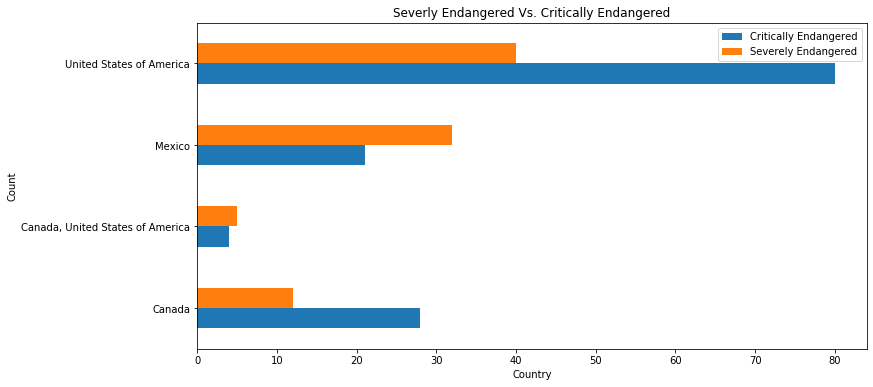

In [13]:
#Critically Endangered
Critically_Endangered_DF = pd.DataFrame(File_DF.loc[(File_DF['Degree of endangerment'] == 'Critically endangered'), :]) 
Critically_Endangered_DF = pd.DataFrame(Critically_Endangered_DF.groupby(['Countries']).count()['Population'])
Critically_Endangered_DF = Critically_Endangered_DF.rename(columns = {'Population':'Critically Endangered'})
Critically_Endangered_DF
#Severly Endangered
Severely_Endangered_DF = pd.DataFrame(File_DF.loc[(File_DF['Degree of endangerment'] == 'Severely endangered'), :]) 
Severely_Endangered_DF = pd.DataFrame(Severely_Endangered_DF.groupby(['Countries']).count()['Population'])
Severely_Endangered_DF = Severely_Endangered_DF.rename(columns = {'Population':'Severely Endangered'})
Severely_Endangered_DF
#Merged DF
Merge_DF = pd.merge(Critically_Endangered_DF, Severely_Endangered_DF, on='Countries')
Merge_DF
#Graph
Merge_DF.plot(kind='barh', figsize=(12, 6), title = "Severly Endangered Vs. Critically Endangered", rot=0)
plt.ylabel("Count")
plt.xlabel("Country")

Text(0.5, 0, 'Country')

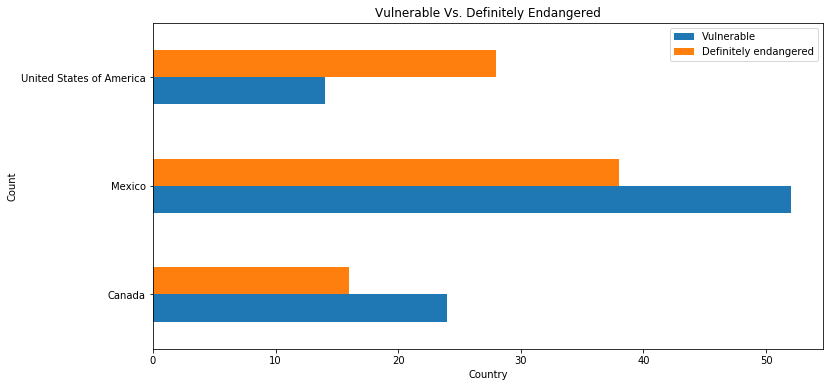

In [10]:
#Vulnerable
vulnerable_DF = pd.DataFrame(File_DF.loc[(File_DF['Degree of endangerment'] == 'Vulnerable'), :]) 
vulnerable_DF = pd.DataFrame(vulnerable_DF.groupby(['Countries']).count()['Population'])
vulnerable_DF = vulnerable_DF.rename(columns = {'Population':'Vulnerable'})
#Definitely Endangered 
definitely_endangered_DF = pd.DataFrame(File_DF.loc[(File_DF['Degree of endangerment'] == 'Definitely endangered'), :])
definitely_endangered_DF = pd.DataFrame(definitely_endangered_DF.groupby(['Countries']).count()['Population'])
definitely_endangered_DF = definitely_endangered_DF.rename(columns = {'Population':'Definitely endangered'})
#Merging Tables
merge_DF = pd.merge(vulnerable_DF, definitely_endangered_DF, on='Countries')
merge_DF
#Graph the merged data
merge_DF.plot(kind='barh', figsize=(12, 6), title = "Vulnerable Vs. Definitely Endangered", rot = 0)
plt.ylabel("Count")
plt.xlabel("Country")

Text(0, 0.5, 'Count')

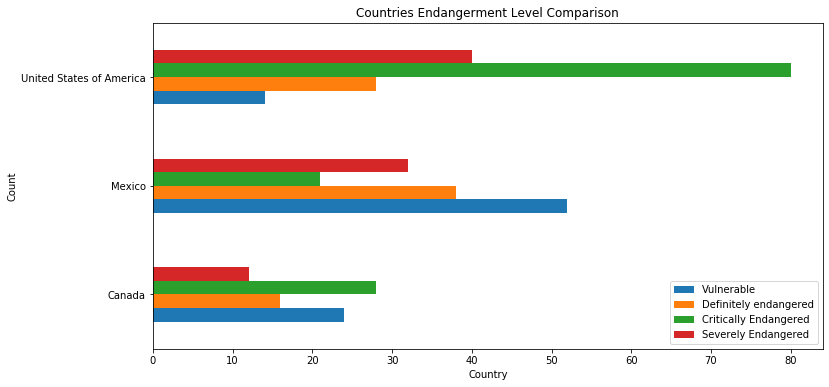

In [11]:
#Create a Bar Plot of all four endangerment levels
Merged_DF = pd.merge(merge_DF, Merge_DF, on='Countries')
Merged_DF.plot(kind='barh', figsize=(12, 6), title = "Countries Endangerment Level Comparison", rot=0)
plt.xlabel('Country')
plt.ylabel('Count')

In [8]:
#Correlation between Degree of endangerment and number of speakers and % of population
Vulnerable = File_DF[(File_DF['Degree of endangerment'] == "Vulnerable")]
Definitely_Endangered = File_DF[(File_DF['Degree of endangerment'] == 'Definitely endangered')]
Critically_Vulnerable = File_DF[(File_DF['Degree of endangerment'] == 'Critically endangered')]
Severely_Vulnerable = File_DF[(File_DF['Degree of endangerment'] == 'Severely endangered')]
#Group By Countries
Vulnerable = Vulnerable.groupby(['Countries']).count()['Population']
Definitely_Endangered = Definitely_Endangered.groupby(['Countries']).count()['Population']
Critically_Vulnerable = Critically_Vulnerable.groupby(['Countries']).count()['Population']
Severely_Vulnerable = Severely_Vulnerable.groupby(['Countries']).count()['Population']
#Create New Columns 
Corr_DF = pd.DataFrame(File_DF.groupby(['Countries']).count())
Corr_DF['Vulnerable'] = Vulnerable
Corr_DF["Definitely Endangered"] = Definitely_Endangered 
Corr_DF["Critically Endangered"] = Critically_Vulnerable
Corr_DF["Severely Endangered"] = Severely_Vulnerable
Corr_DF = Corr_DF[['Vulnerable', 'Definitely Endangered', 'Critically Endangered', 'Severely Endangered', 'Number of speakers']]
Correlation_DF = Corr_DF.corr()
#Highlight the Correlation based on strength
def color_code(number):
    if (0.7 < number) & (number < 1):
        color = 'darkblue'
    elif (number < -0.7):
        color = 'red'
    elif (number > 0) & (number < 0.7):
        color = 'purple'
    elif (number < 0):
        color = 'lightcoral'
    else:
        color = 'black'
    return 'color: %s' % color
Corr_df = Correlation_DF.style.applymap(color_code)
Corr_df

Text(0, 0.5, 'Count')

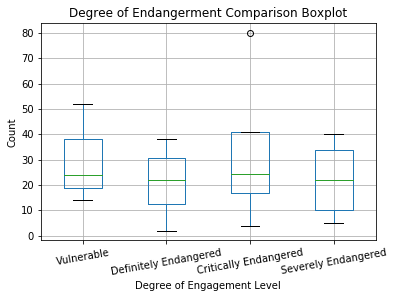

In [26]:
Boxplot_DF = Corr_DF[['Vulnerable', 'Definitely Endangered', 'Critically Endangered', 'Severely Endangered']]
Boxplot_DF.boxplot(rot = 10)
plt.title('Degree of Endangerment Comparison Boxplot')
plt.xlabel('Degree of Engagement Level')
plt.ylabel('Count')

In [ ]:
Degree = pd.DataFrame(File_DF.groupby(['Countries', 'Degree of endangerment']).count()['ID'])
degree = Degree.iloc[8:12]
degree.plot(kind='pie', subplots='True')

In [ ]:
Degree

In [ ]:
df2 = pd.DataFrame({
    'Degree': ['Vulnerable', 'Definetly endangered', 'Critically endangered', 'Severly endangered', 'Extinct']})
df = pd.merge(df, df2, on='day')
df = df.sort_values('num')
dfx = df.groupby(['group'])
dfx.plot(kind='bar', x='day')

In [ ]:
df=pd.DataFrame({
    'group':['a','a','a','a','a','a','a','b','b','b','b','b','b','b'],
    'day':['Mon','Tues','Fri','Thurs','Sat','Sun','Weds','Fri','Sun','Thurs','Sat','Weds','Mon','Tues'],
    'amount':[1,2,4,2,1,1,2,4,5,3,4,2,1,3]
})
# Calculate the total amount for each day
df_grouped = df.groupby(['day']).sum().amount.reset_index()
# Use Dan's trick to order days names in the table created by groupby
weekdays = ['Mon', 'Tues', 'Weds', 'Thurs', 'Fri', 'Sat', 'Sun']
mapping = {day: i for i, day in enumerate(weekdays)}
key = df_grouped['day'].map(mapping)    
df_grouped = df_grouped.iloc[key.argsort()]
# Draw the bar chart
df_grouped.plot(kind='bar', x='day')

In [ ]:
File_df.head(25)